In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_adult = pd.read_csv("adult.csv", na_values='?')

# # Adapted from https://stats.stackexchange.com/questions/239973/a-general-measure-of-data-set-imbalance
# def is_balanced(seq):
#     n = len(seq)
#     classes = [(clas, float(count)) for clas, count in Counter(seq).items()]
#     k = len(classes)

#     H = -sum([(count/n) * np.log((count/n)) for clas, count in classes])
#     return H/np.log(k) > 0.75

print(df_adult.head())
print(df_adult.shape)
print(df_adult.info())
df_adult = pd.read_csv("adult.csv")
df_adult.drop('fnlwgt',axis=1, inplace=True)
df_adult.rename(
    columns={
        'capital-gain': 'capital_gain',
        'capital-loss': 'capital_loss',
        'native-country': 'country',
        'hours-per-week': 'hours',
        'marital-status': 'marital'
    },
    inplace=True
)
df_adult.columns

df_adult.workclass = df_adult.workclass.replace({'Self-emp-not-inc': 'Self-emp',
                                        'Self-emp-inc': 'Self-emp',
                                        'Local-gov': 'Gov',
                                        'Federal-gov': 'Gov',
                                        'State-gov': 'Gov'})


df_adult = df_adult[['age','workclass','educational-num','gender','race','hours','occupation','income']]

#df_adult.drop(columns=['education', 'fnlwgt', 'relationship'], axis=1, inplace=True)



# Fix up missing workclass by replacing with most common
categories, counts = np.unique(df_adult['workclass'], return_counts = True)
most_freq_workclass = categories[np.argmax(counts, axis=0)]
print(f"Most frequent workclass is: {most_freq_workclass}")
df_adult['workclass'][df_adult['workclass'] == '?'] = most_freq_workclass

# Fix up missing occupation by replacing with most common
categories, counts = np.unique(df_adult['occupation'], return_counts = True)
most_freq_occupation = categories[np.argmax(counts, axis=0)]
print(f"Most frequent occupation is: {most_freq_occupation}")
df_adult['occupation'][df_adult['occupation'] == '?'] = most_freq_occupation

# Fix up missing native-country by replacing with most common
# categories, counts = np.unique(df_adult['country'], return_counts = True)
# most_freq_country = categories[np.argmax(counts, axis=0)]
# print(f"Most frequent native-country is: {most_freq_country}")
# df_adult['country'][df_adult['country'] == '?'] = most_freq_country

print(df_adult.head())
print(df_adult.describe())



   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18        NaN  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-country incom

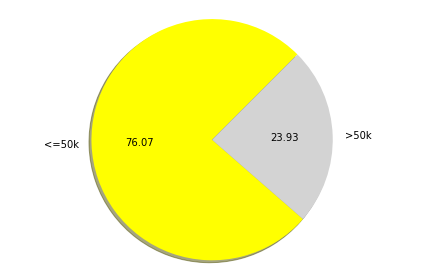

In [13]:
#Count how often people earn more and less than 50k
lte_50k = 0
gt_50k = 0
for income in df_adult.income:
    if income == '<=50K':
        lte_50k += 1
    if income == '>50K':
        gt_50k += 1

#Set up pie chart
colors = ['yellow', 'lightgrey']
values = [lte_50k, gt_50k] 
labels = ['<=50k', '>50k'] 
plt.pie(values, labels=labels, colors=colors, shadow=True, startangle=45, autopct='%.2f')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [50]:
# No missing values
print(df_adult.head())
print(df_adult.info())

   age workclass  educational-num  gender   race  hours         occupation  \
0   25   Private                7    Male  Black     40  Machine-op-inspct   
1   38   Private                9    Male  White     50    Farming-fishing   
2   28       Gov               12    Male  White     40    Protective-serv   
3   44   Private               10    Male  Black     40  Machine-op-inspct   
4   18   Private               10  Female  White     30     Prof-specialty   

  income  
0  <=50K  
1  <=50K  
2   >50K  
3   >50K  
4  <=50K  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   educational-num  48842 non-null  int64 
 3   gender           48842 non-null  object
 4   race             48842 non-null  object
 5   hours            48842 non-null  int6

Index(['age', 'educational-num', 'hours'], dtype='object')
Index(['workclass', 'gender', 'race', 'occupation'], dtype='object')
age                187.978083
educational-num      6.609901
hours              153.547885
dtype: float64


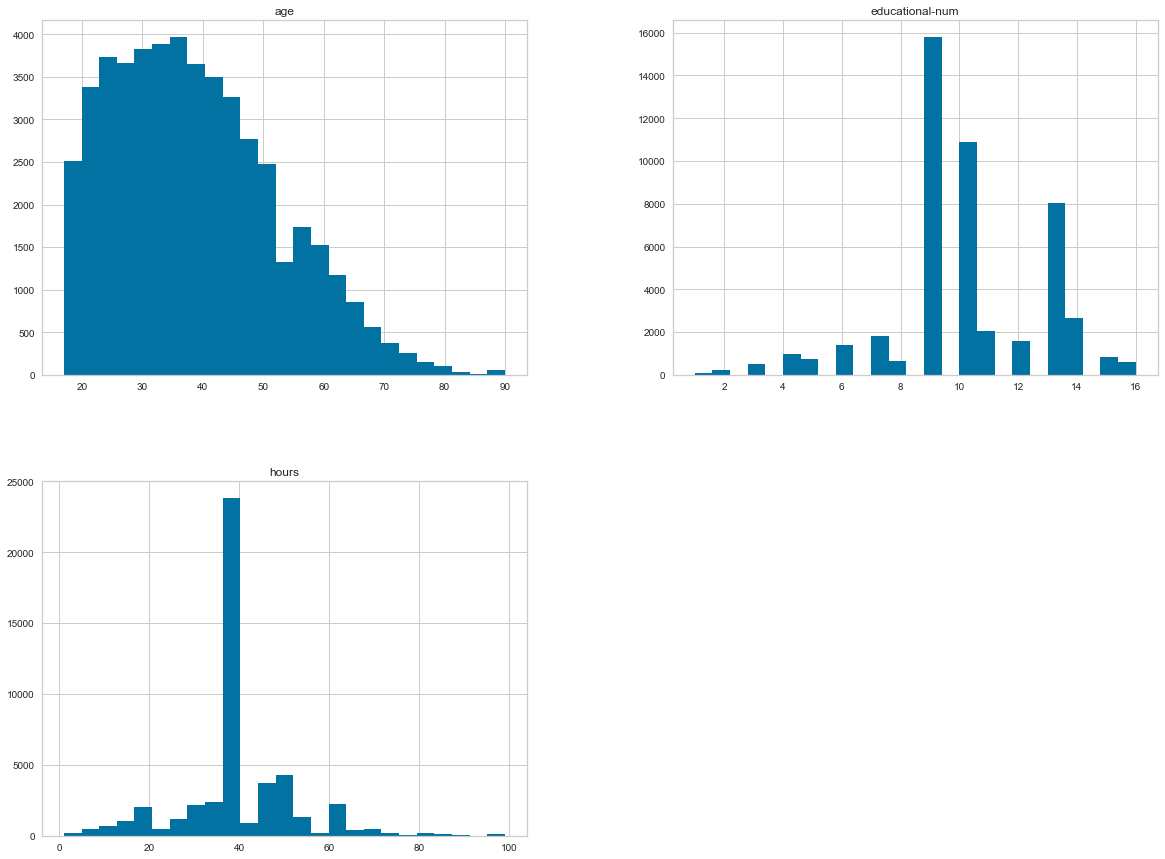

In [51]:
#numeric = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
num_ix = df_adult.select_dtypes(include=['int64', 'float64']).columns
#df_adult.drop(columns=['fnlwgt', 'relationship'], axis=1, inplace=True)
cat_ix = df_adult.drop(columns='income',axis=1).select_dtypes(include=['object', 'bool']).columns
print(num_ix)
print(cat_ix)
print(df_adult[num_ix].var())
%matplotlib inline
import matplotlib.pyplot as plt
_ = df_adult.hist(bins=25, figsize=(20,15))
plt.show()


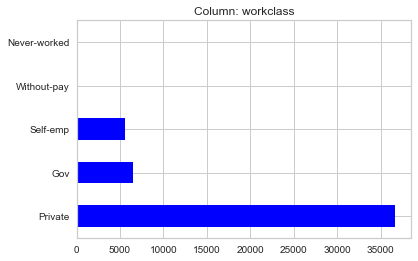

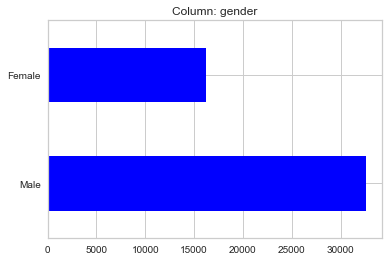

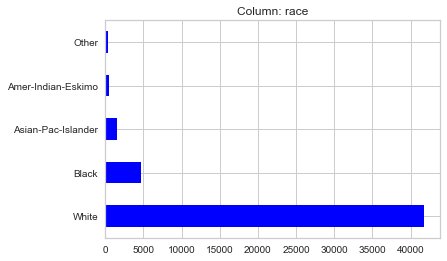

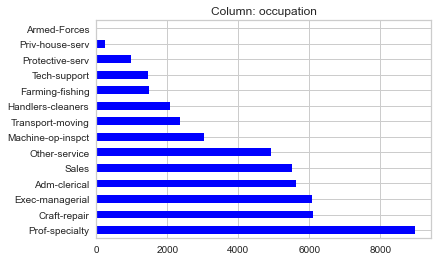

In [52]:
for colname in df_adult[cat_ix]:
    plt.title('Column: ' + colname)

    (df_adult[colname]
         .value_counts()
         .head(20)
         .plot(kind='barh', color='blue'))

    plt.show()

In [17]:
# US dominates since data is US census
# White is by far the largest race
# private industry is by far largest workclass

Based on variance, looks like we should standardize the data

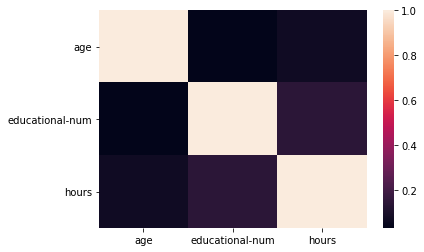

In [18]:
import seaborn as sns
corr = df_adult[num_ix].corr()
sns.heatmap(
    corr, 
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
);

Low correlation between numeric features

### Preprocess Data

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler

# Dummies
# df_adult_dummies = pd.get_dummies(df_adult)
# print(df_adult_dummies)
# features = df_adult_dummies.loc[:, 'age':'occupation_Transport-moving']
# X = features.values
# y = df_adult_dummies['income_>50K'].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

ct = ColumnTransformer(
    [
        ("scaling", StandardScaler(), ['age', 'educational-num','hours']),
        ("onehot", OneHotEncoder(sparse=False), ['workclass', 'gender', 'occupation'])
    ]
)

df_adult_features = df_adult.drop('income', axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    df_adult_features,
    df_adult.income,
    test_size=0.2,
    random_state=1
)

X_train_trans = ct.fit_transform(X_train)
X_test_trans = ct.transform(X_test)


# X = df_adult.drop(['income'], axis=1).to_numpy()
# y = df_adult['income'].to_numpy()
# df_adult_dummies = pd.get_dummies(df_adult)
# print(df_adult_dummies.columns)
# X_train, X_test, y_train, y_test = train_test_split(df_adult.drop(['income'], axis=1), df_adult['income'], test_size=0.2, stratify=y, random_state=1)
# X_train_trans = ct.fit_transform(X_train)

#X_train.head()

C:\Users\josem\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\josem\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\josem\Anaconda3\lib\site-packages\sklearn\pipeline.py:605: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


### Decision Tree Classifier

#### Train Model and Base Performance

Cross-val score with 10-folds:  0.7649783584989932


[[-0.55407243 -0.41728538 -0.03163846 ...  0.          0.
   1.        ]
 [-0.99217786 -0.41728538 -0.03163846 ...  0.          0.
   0.        ]
 [-0.18898457  2.30611212 -0.84232077 ...  0.          0.
   0.        ]
 ...
 [ 1.1983493  -0.41728538 -0.03163846 ...  0.          0.
   0.        ]
 [ 0.10308572 -0.41728538  0.3737027  ...  0.          0.
   0.        ]
 [ 0.46817358 -0.41728538 -1.16659369 ...  0.          1.
   0.        ]]


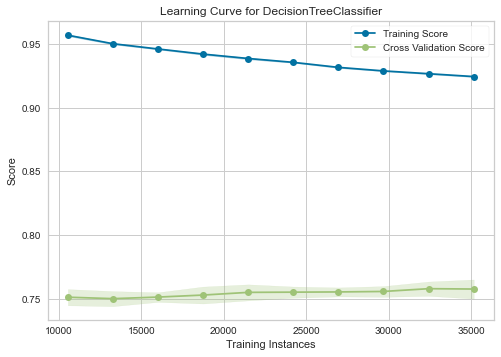

<AxesSubplot:title={'center':'Learning Curve for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion='gini', random_state=1)
tree_clf.fit(X_train_trans, y_train)

#tree_clf.score(X_test_trans, y_test)

y_pred = tree_clf.predict(X_test_trans)
accuracy_score(y_test, y_pred)

#########################
# Cross validation score
#########################
from sklearn.model_selection import cross_val_score
cv = cross_val_score(tree_clf, X_train_trans, y_train, cv=10, n_jobs=-1)
print("Cross-val score with 10-folds: ",cv.mean())
print("\n")

print(X_test_trans)
#########################
# ROC curve and roc_auc_score
#########################
# from sklearn.metrics import roc_curve, roc_auc_score

# y_pred_proba_tree = tree_clf.predict_proba(X_test_trans)[:,1]
# print(y_pred_proba_tree)

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr_tree, tpr_tree, thresholds = roc_curve(y_test,y_pred_proba_tree)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr_tree, tpr_tree)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve - Base Decision Tree CLF')
# plt.show()

# # Compute test_roc_auc
# test_roc_auc = roc_auc_score(y_test, y_pred_proba_tree)
# print("Test set ROC AUC score: {:.3f}".format(test_roc_auc))

from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 10)
visualizer = LearningCurve(
    tree_clf, cv=10, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X_train_trans, y_train)        # Fit the data to the visualizer
visualizer.show()  

#### Fine Tune Model

In [55]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint
dt = DecisionTreeClassifier(criterion='gini', random_state=1)
print("Base model parameters:")
pprint(tree_clf.get_params())
print("\n")

# Define the map of hyperparameters to explore
params_dt = {
    'max_depth': [3,4,5,6,7,8],
    'min_samples_leaf': [0.04, 0.06, 0.08],
    'max_features': [0.2, 0.4, 0.6, 0.8]
}
# 10-fold stratified cross validation
grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring='accuracy',cv=10,n_jobs=-1)

grid_dt.fit(X_train_trans, y_train)
best_hyperparams = grid_dt.best_params_
print("Best hyperparameters:")
pprint(best_hyperparams)
print("\n")


best_CV_score = grid_dt.best_score_
print("Best 10-fold CV accuracy: {}".format(best_CV_score))

Base model parameters:
{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 1,
 'splitter': 'best'}


Best hyperparameters:
{'max_depth': 7, 'max_features': 0.8, 'min_samples_leaf': 0.04}


Best 10-fold CV accuracy: 0.8038799170782893


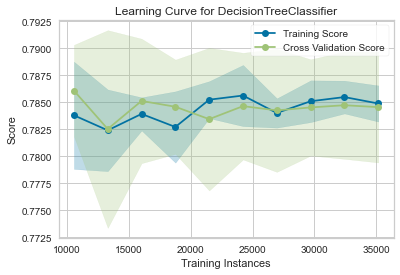

<AxesSubplot:title={'center':'Learning Curve for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [63]:
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 10)
visualizer = LearningCurve(
    grid_dt.best_estimator_, cv=10, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X_train_trans, y_train)        # Fit the data to the visualizer
visualizer.show()  

In [61]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

### Boosting with Adaboost

In [25]:
from sklearn.ensemble import AdaBoostClassifier

stump_clf = DecisionTreeClassifier(max_depth=1, random_state=1)
adb_clf = AdaBoostClassifier(base_estimator=stump_clf, random_state=1)
adb_clf.fit(X_train_trans, y_train)

#########################
# Cross validation score
#########################
cv = cross_val_score(adb_clf, X_train_trans, y_train, cv=10, n_jobs=-1)
print("Cross-val score with 10-folds: ",cv.mean())
print("\n")

Cross-val score with 10-folds:  0.816369879906089




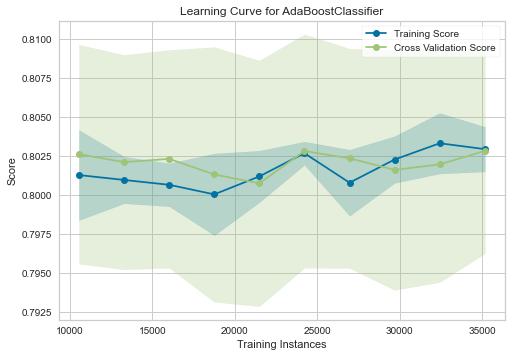

<AxesSubplot:title={'center':'Learning Curve for AdaBoostClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [27]:
#plot_learning_curves(grid_dt, X, y)
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 10)
visualizer = LearningCurve(
    adb_clf, cv=10, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X_train_trans, y_train)        # Fit the data to the visualizer
visualizer.show()

#### Fine Tune Model

In [65]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint
#dt = DecisionTreeClassifier(criterion='gini', random_state=1)
print("Base model parameters:")
pprint(adb_clf.get_params())
print("\n")

# Define the map of hyperparameters to explore
params_adb = {
    'n_estimators': [300,400,500,800],
    'learning_rate': [0.3,0.4,0.5],
}
# 10-fold stratified cross validation
grid_adb = GridSearchCV(estimator=adb_clf, param_grid=params_adb, scoring='accuracy',cv=10,n_jobs=-1)

grid_adb.fit(X_train_trans, y_train)
best_hyperparams = grid_adb.best_params_
print("Best hyperparameters:")
pprint(best_hyperparams)
print("\n")


best_CV_score = grid_adb.best_score_
print("Best 10-fold CV accuracy: {}".format(best_CV_score))

Base model parameters:
{'algorithm': 'SAMME.R',
 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 1,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': False,
 'base_estimator__random_state': 1,
 'base_estimator__splitter': 'best',
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 1}


B

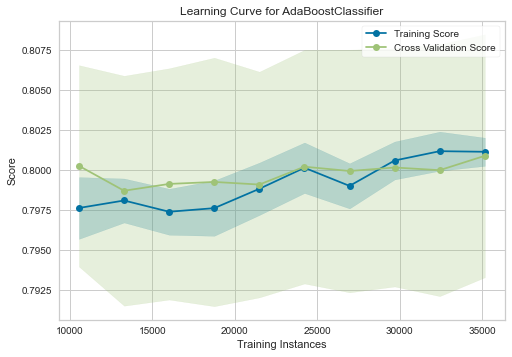

<AxesSubplot:title={'center':'Learning Curve for AdaBoostClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [31]:
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 10)
visualizer = LearningCurve(
    grid_adb.best_estimator_, cv=10, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X_train_trans, y_train)        # Fit the data to the visualizer
visualizer.show() 

### KNN

#### Base Model and Perf

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_trans, y_train)

y_pred = knn_clf.predict(X_test_trans)
accuracy_score(y_test, y_pred)

#########################
# Cross validation score
#########################
from sklearn.model_selection import cross_val_score
cv = cross_val_score(knn_clf, X_train_trans, y_train, cv=10, n_jobs=-1)
print("Cross-val score with 10-folds: ",cv.mean())
print("\n")

Cross-val score with 10-folds:  0.7909559305141095




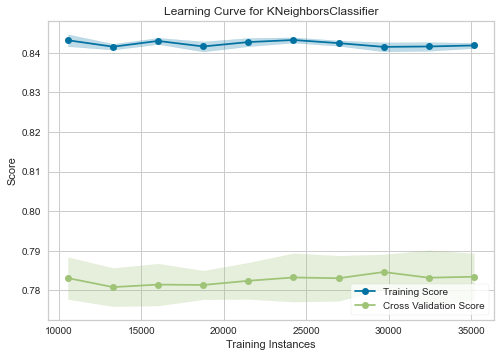

<AxesSubplot:title={'center':'Learning Curve for KNeighborsClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [35]:
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 10)
visualizer = LearningCurve(
    knn_clf, cv=10, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X_train_trans, y_train)        # Fit the data to the visualizer
visualizer.show() 

#### Fine Tune Model

In [37]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint

print("Base model parameters:")
pprint(knn_clf.get_params())
print("\n")

# Define the map of hyperparameters to explore
params_knn = {
    'n_neighbors': [3,5,8,13,15],
    'weights': ['uniform','distance'],
    'p': [1,5,10,30]
}
# 10-fold stratified cross validation
grid_knn = GridSearchCV(estimator=knn_clf, param_grid=params_knn, scoring='accuracy',cv=10,n_jobs=-1)

grid_knn.fit(X_train_trans, y_train)
best_hyperparams = grid_knn.best_params_
print("Best hyperparameters:")
pprint(best_hyperparams)
print("\n")


best_CV_score = grid_knn.best_score_
print("Best 10-fold CV accuracy: {}".format(best_CV_score))


Base model parameters:
{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


Best hyperparameters:
{'n_neighbors': 15, 'p': 5, 'weights': 'uniform'}


Best 10-fold CV accuracy: 0.8085378650218821


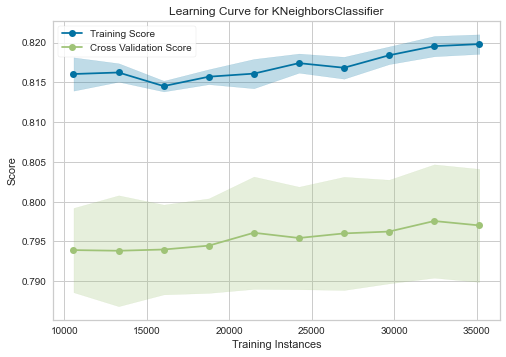

<AxesSubplot:title={'center':'Learning Curve for KNeighborsClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [39]:
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 10)
visualizer = LearningCurve(
    grid_knn.best_estimator_, cv=10, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X_train_trans, y_train)        # Fit the data to the visualizer
visualizer.show() 

### Neural Net

### Support Vector Machine

#### Base Model and Perf

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_clf = SVC()

svm_clf.fit(X_train_trans, y_train)
print(f"Training score is: {svm_clf.score(X_train_trans, y_train)}")
print(f"Test set score is: {svm_clf.score(X_test_trans, y_test)}")
print("\n\n")

#y_pred = svm_clf.predict(X_test)

#########################
# Cross validation score
#########################
from sklearn.model_selection import cross_val_score
cv = cross_val_score(svm_clf, X_train_trans, y_train, cv=5, n_jobs=-1)
print("Cross-val score with 10-folds: ",cv.mean())
print("\n")

C:\Users\josem\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training score is: 0.8149873314053182
Test set score is: 0.8105230832224384



Cross-val score with 10-folds:  0.8140408645504464




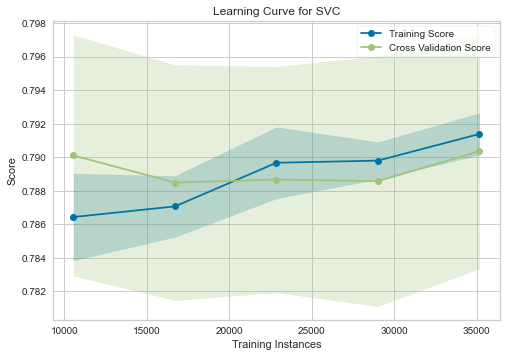

<AxesSubplot:title={'center':'Learning Curve for SVC'}, xlabel='Training Instances', ylabel='Score'>

In [43]:
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 5)
visualizer = LearningCurve(
    svm_clf, cv=10, scoring='f1_weighted', train_sizes=sizes, n_jobs=8
)

visualizer.fit(X_train_trans, y_train)        # Fit the data to the visualizer
visualizer.show() 

#### Fine Tune Model

In [45]:
#With Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
svc = SVC()
pprint(svc.get_params())
params_svc = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly'],
    'degree': [1,3,5],
    'coef0': [0,1],
}
# 10-fold stratified cross validation
grid_svm = GridSearchCV(estimator=svc, param_grid=params_svc, scoring='accuracy',cv=5,n_jobs=-1)

grid_svm.fit(X_train_trans,y_train)
print(f"With Hyperparameter tuning: {grid_svm.get_params()}")


{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


C:\Users\josem\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With Hyperparameter tuning: {'cv': 5, 'error_score': 'raise-deprecating', 'estimator__C': 1.0, 'estimator__cache_size': 200, 'estimator__class_weight': None, 'estimator__coef0': 0.0, 'estimator__decision_function_shape': 'ovr', 'estimator__degree': 3, 'estimator__gamma': 'auto_deprecated', 'estimator__kernel': 'rbf', 'estimator__max_iter': -1, 'estimator__probability': False, 'estimator__random_state': None, 'estimator__shrinking': True, 'estimator__tol': 0.001, 'estimator__verbose': False, 'estimator': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False), 'fit_params': None, 'iid': 'warn', 'n_jobs': -1, 'param_grid': {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'poly'], 'degree': [1, 2, 3, 5, 10], 'coef0': [0, 1]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': 'warn', 'scoring': 'accu

ValueError: could not convert string to float: 'Private'

In [46]:
print(f"Train set score: {grid_svm.score(X_train_trans, y_train)}")
print(f"Test set score: {grid_svm.score(X_test_trans, y_test)}")


#y_pred = svm_clf_tuned.predict(X_test)

#########################
# Cross validation score
#########################
from sklearn.model_selection import cross_val_score
cv = cross_val_score(grid_svm.best_estimator_, X_train_trans, y_train, cv=5, n_jobs=-1)
print("Cross-val score with 10-folds: ",cv.mean())
print("\n")

Train set score: 0.8202083280014332
Test set score: 0.8085781553894974
Cross-val score with 10-folds:  0.8158320720016127




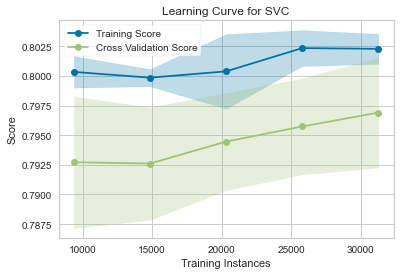

<AxesSubplot:title={'center':'Learning Curve for SVC'}, xlabel='Training Instances', ylabel='Score'>

In [66]:
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 5)
visualizer = LearningCurve(
    grid_svm.best_estimator_, cv=5, scoring='f1_weighted', train_sizes=sizes, n_jobs=8
)

visualizer.fit(X_train_trans, y_train)        # Fit the data to the visualizer
visualizer.show() 

### Multilayer Perceptron (ANN)

In [104]:
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing

print(tf.__version__)
print(keras.__version__)
from tensorflow import keras
# keras.layers import Dense
#from keras.models import Sequential
n_cols = X_train_trans.shape[1]
print(n_cols)
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape=(n_cols,)))
#model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_trans = le.fit_transform(y_train)
y_test_trans = le.fit_transform(y_test)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )
#validation_data=(X_test_std, y_test))
history_1 = model.fit(X_train_trans, y_train_trans, epochs=30, validation_data=(X_test_trans, y_test_trans))
#istory_test_1 =  model.fit(X_test_trans, y_test_trans, validation_split=0.2, epochs=30)
# std_scaler = preprocessing.StandardScaler()
# X_train_std = std_scaler.fit_transform(X_train)
# X_test_std = std_scaler.fit_transform(X_test)
# y_train_std =std_scaler.fit_transform(y_train.reshape(-1, 1))
# history_stdscale = model.fit(X_train_std, y_train, validation_split=0.2, epochs=30)

2.3.0
2.4.0
24
Epoch 1/30
1222/1222 [==============================] - 1s 819us/step - loss: 0.4010 - accuracy: 0.8140 - val_loss: 0.3996 - val_accuracy: 0.8093
Epoch 2/30
1222/1222 [==============================] - 1s 743us/step - loss: 0.3912 - accuracy: 0.8183 - val_loss: 0.3995 - val_accuracy: 0.8110
Epoch 3/30
1222/1222 [==============================] - 1s 774us/step - loss: 0.3897 - accuracy: 0.8183 - val_loss: 0.3964 - val_accuracy: 0.8124
Epoch 4/30
1222/1222 [==============================] - 1s 743us/step - loss: 0.3881 - accuracy: 0.8193 - val_loss: 0.3949 - val_accuracy: 0.8129
Epoch 5/30
1222/1222 [==============================] - 1s 751us/step - loss: 0.3870 - accuracy: 0.8196 - val_loss: 0.3939 - val_accuracy: 0.8127
Epoch 6/30
1222/1222 [==============================] - 1s 750us/step - loss: 0.3859 - accuracy: 0.8202 - val_loss: 0.3938 - val_accuracy: 0.8110
Epoch 7/30
1222/1222 [==============================] - 1s 759us/step - loss: 0.3865 - accuracy: 0.8191 - val

NameError: name 'h' is not defined

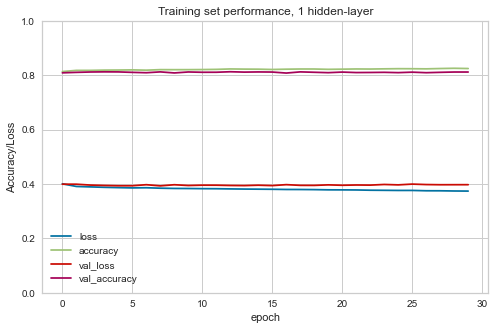

In [105]:
pd.DataFrame(history_1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.title("ANN, 1 hidden-layer")
plt.ylabel("Accuracy/Loss")
plt.xlabel("epoch")
plt.show()

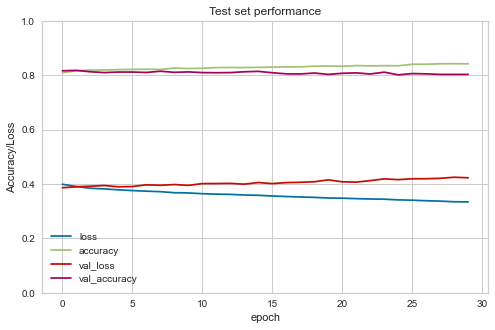

In [90]:
# pd.DataFrame(history_test_1.history).plot(figsize=(8,5))
# plt.grid(True)
# plt.gca().set_ylim(0,1)
# plt.title("Test set performance, 1 hidden-layer")
# plt.ylabel("Accuracy/Loss")
# plt.xlabel("epoch")
# plt.show()

In [98]:
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
# from sklearn.model_selection import RandomizedSearchCV

# params_distribs = {
#     'n_hidden': [3,4,5],
#     'n_neurons': [50,100,200,500],
#     'learning_rate': [1e-1, 1e-2, 1e-3]
# }



print(tf.__version__)
print(keras.__version__)
from tensorflow import keras
# keras.layers import Dense
#from keras.models import Sequential
n_cols = X_train_trans.shape[1]
print(n_cols)
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape=(n_cols,)))
model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_trans = le.fit_transform(y_train)
y_test_trans = le.fit_transform(y_test)
opt = keras.optimizers.Adam(learning_rate=0.0003)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'] )
# rand_search_cv = RandomizedSearchCV(model, param_distribs, n_iter=5, cv=3)
history = model.fit(X_train_trans, y_train_trans, validation_split=0.2, epochs=30)

2.3.0
2.4.0
24
Epoch 1/30
977/977 [==============================] - 1s 823us/step - loss: 0.4161 - accuracy: 0.8064 - val_loss: 0.3896 - val_accuracy: 0.8191
Epoch 2/30
977/977 [==============================] - 1s 755us/step - loss: 0.3941 - accuracy: 0.8163 - val_loss: 0.3892 - val_accuracy: 0.8187
Epoch 3/30
977/977 [==============================] - 1s 762us/step - loss: 0.3917 - accuracy: 0.8173 - val_loss: 0.3890 - val_accuracy: 0.8184
Epoch 4/30
977/977 [==============================] - 1s 757us/step - loss: 0.3904 - accuracy: 0.8192 - val_loss: 0.3857 - val_accuracy: 0.8230
Epoch 5/30
977/977 [==============================] - 1s 754us/step - loss: 0.3890 - accuracy: 0.8188 - val_loss: 0.3858 - val_accuracy: 0.8220
Epoch 6/30
977/977 [==============================] - 1s 751us/step - loss: 0.3882 - accuracy: 0.8187 - val_loss: 0.3843 - val_accuracy: 0.8219
Epoch 7/30
977/977 [==============================] - 1s 767us/step - loss: 0.3876 - accuracy: 0.8193 - val_loss: 0.3838 

In [102]:
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
# from sklearn.model_selection import RandomizedSearchCV

# params_distribs = {
#     'n_hidden': [3,4,5],
#     'n_neurons': [50,100,200,500],
#     'learning_rate': [1e-1, 1e-2, 1e-3]
# }



print(tf.__version__)
print(keras.__version__)
from tensorflow import keras
# keras.layers import Dense
#from keras.models import Sequential
n_cols = X_train_trans.shape[1]
print(n_cols)
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation='relu', input_shape=(n_cols,)))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_trans = le.fit_transform(y_train)
y_test_trans = le.fit_transform(y_test)
#opt = keras.optimizers.Adam(learning_rate=0.0003)
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'] )
# rand_search_cv = RandomizedSearchCV(model, param_distribs, n_iter=5, cv=3)
history = model.fit(X_train_trans, y_train_trans, validation_split=0.2, epochs=30)

2.3.0
2.4.0
24
Epoch 1/30
977/977 [==============================] - 2s 2ms/step - loss: 0.4083 - accuracy: 0.8106 - val_loss: 0.3882 - val_accuracy: 0.8192
Epoch 2/30
977/977 [==============================] - 2s 2ms/step - loss: 0.3973 - accuracy: 0.8160 - val_loss: 0.3945 - val_accuracy: 0.8210
Epoch 3/30
977/977 [==============================] - 2s 2ms/step - loss: 0.3940 - accuracy: 0.8151 - val_loss: 0.3932 - val_accuracy: 0.8178
Epoch 4/30
977/977 [==============================] - 2s 2ms/step - loss: 0.3933 - accuracy: 0.8168 - val_loss: 0.3901 - val_accuracy: 0.8216
Epoch 5/30
977/977 [==============================] - 2s 2ms/step - loss: 0.3916 - accuracy: 0.8166 - val_loss: 0.3891 - val_accuracy: 0.8200
Epoch 6/30
977/977 [==============================] - 2s 2ms/step - loss: 0.3898 - accuracy: 0.8181 - val_loss: 0.3941 - val_accuracy: 0.8215
Epoch 7/30
977/977 [==============================] - 2s 2ms/step - loss: 0.3887 - accuracy: 0.8176 - val_loss: 0.3913 - val_accuracy

In [94]:
1e-1

0.1